# Experimenting with Package Functions

IN PROGRESS

## (1) Data generation with MOSFIT

In [ ]:
from survey_agnostic_sn_vae.data_generation.mosfit2 import *
# from ..survey_agnostic_sn_vae.data_generation.objects import *
import os
OUTPUT_PATH = os.getcwd()
print(OUTPUT_PATH)
os.makedirs(OUTPUT_PATH+"/transients", exist_ok=True)

#print(OUTPUT_PATH)
#for f in glob.glob(OUTPUT_PATH+"/transients/*"):
#    os.remove(f) 

gen_single_core(0)


Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
/Users/kdesoto/python_repos/survey-agnostic-sn-vae/data
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit


In [3]:
from survey_agnostic_sn_vae.data_generation.objects import *

OUTPUT_PATH = os.getcwd()

# Now, load Transient object
all_transient_fns = glob.glob(OUTPUT_PATH+"/transients/*")
test_transient = Transient.load(
    all_transient_fns[0],
)
print(test_transient.lightcurves) # should be 2
for lc in test_transient.lightcurves:
    print(lc.bands)
    print(lc.survey.bands)

Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
[<survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x106073880>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x15798f250>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x1749f0160>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x303416320>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x303415030>]
['g' 'i' 'r' 'u' 'y

In [1]:
import os
from survey_agnostic_sn_vae.preprocessing import (
    generate_superraenn_lc_file
)

OUTPUT_PATH = os.getcwd()

transient_dir = os.path.join(
    OUTPUT_PATH,
    "transients"
)
save_dir = os.path.join(
    OUTPUT_PATH,
    "superraenn"
)

os.makedirs(save_dir, exist_ok=True)

generate_superraenn_lc_file(
    transient_dir,
    save_dir
)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100


In [7]:
# overlay multiple LCs for same object 
from survey_agnostic_sn_vae.plotting import plot_lightcurves
from survey_agnostic_sn_vae.data_generation.objects import *

import os

OUTPUT_PATH = os.getcwd()

FILT_LIM_MAGS = np.load(
    os.path.join('/Users/kdesoto/python_repos/survey-agnostic-sn-vae/src/survey_agnostic_sn_vae/data_generation/lim_mags.npz'),
    allow_pickle=True
)['lim_mags'].item() # CHANGE TO WHATEVER HERE

print(FILT_LIM_MAGS['LSST r'])

# Now, load Transient obje dct
all_transient_fns = glob.glob(OUTPUT_PATH+"/transients/*")
test_transient = Transient.load(
    all_transient_fns[3],
)

plot_lightcurves(
    test_transient,
    os.path.join(OUTPUT_PATH, "sample_transient.pdf")
)

24.52
5
3 3
2 2
4 4
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


## Test RAENN encodings

 (1) First try just VAE encodings without similarity loss

In [ ]:
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import *
import pretty_errors

OUTDIR = 'superraenn'
LCFILE = 'superraenn/lcs.npz'

device = 'cpu'
batch_size=128

sequence, outseq, loss_mask, meta_dict = prep_input(LCFILE, save=True, outdir=OUTDIR)
sequence_copy = np.copy(sequence)
outseq_copy = np.copy(outseq)

"""
model = VAE(
    sequence[:,:,:-1].shape,
    hidden_dim=100,
    latent_dim=4,
    device=device
)

model_fn = os.path.join(OUTDIR, "models_contrastive/model_2024-05-13_2_100.pt")
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = 32

model = fit_model(
        model, sequence, outseq, loss_mask,
        n_epochs=1000, device=device,
        batch_size=batch_size, learning_rate=1e-3,
        add_contrastive=False,
        latent_space_plot_dir=None
)
model.save(
    outdir=OUTDIR,
)
dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, ids=ids, outdir=OUTDIR
)
"""
for metric in [
    #"cosine_means",
    #'cosine', 'euclidean',
    #'euclidean_means',
    'mahalonobis',
    'wasserstein'
]:
    #model_fn = os.path.join(OUTDIR, "models/model_2024-05-17_2_100.pt")
    model_fn = os.path.join(OUTDIR, f"contrastive2_{metric}/model_2_100.pt")
    model = torch.load(model_fn).to(device)
    model.device = device
    model.maxlen = 32
    print(metric)
    model = fit_model(
        model, sequence, outseq, loss_mask,
        n_epochs=500, device=device,
        batch_size=batch_size, learning_rate=1e-4,
        add_contrastive=True, metric=metric, temp=1.0,
        latent_space_plot_dir='figs/latent_space'
    )
    os.makedirs(f'superraenn/contrastive2_{metric}', exist_ok=True)
    model.save(
        outdir=OUTDIR,
        model_dir=f'contrastive2_{metric}',
    )
    dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
    model.save_outputs(
        dataset, meta=meta_dict, outdir=OUTDIR, model_dir=f'contrastive2_{metric}'
    )


mahalonobis
	Epoch 1 	Train Loss:  26.403279921587774 	Val Loss:  26.66152420043945
	Train [21.62664222717285, 3.085871458053589, 3.5351431369781494] 	Test [21.272781372070312, 3.0859577655792236, 4.047938346862793]
	Epoch 11 	Train Loss:  22.259756200453815 	Val Loss:  25.819044876098634
	Train [20.423513412475586, 2.8292696475982666, 3.013822078704834] 	Test [20.148988723754883, 2.8017966747283936, 3.318946361541748]
	Epoch 21 	Train Loss:  21.183561100679285 	Val Loss:  24.671813201904296
	Train [12.698709487915039, 2.710057497024536, 1.7369060516357422] 	Test [19.782047271728516, 2.698639392852783, 3.0594077110290527]
	Epoch 31 	Train Loss:  20.281960094676297 	Val Loss:  24.09344940185547
	Train [13.299559593200684, 2.647298574447632, 2.1577343940734863] 	Test [19.128013610839844, 2.664848566055298, 2.8312880992889404]
	Epoch 41 	Train Loss:  20.134123970480527 	Val Loss:  24.438197708129884
	Train [10.865701675415039, 2.5896942615509033, 2.9210333824157715] 	Test [19.675174713134

In [14]:
from sklearn.model_selection import train_test_split
# compare inter-modal and cross-modal reconstructions for each metric
import torch
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import SNDataset
from survey_agnostic_sn_vae.metrics import *
LCFILE = 'superraenn/lcs.npz'
OUTDIR = 'superraenn'
PREPFILE = 'superraenn/prep.npz'

sequence, outseq, loss_mask, meta_dict = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)
device = 'cpu'
seq_ids = sequence[:,0,-1]
sequence = sequence[:,:,:-1]

(
    train_seq, test_seq,
    train_out, test_out,
    train_id, test_id,
    train_mask, test_mask
) = train_test_split(
    sequence, outseq,
    seq_ids, loss_mask,
    shuffle=False,
    test_size=0.2
)

dataset = SNDataset(test_seq, test_out, test_id, test_mask, device=device)
train_dataset = SNDataset(train_seq, train_out, train_id, train_mask, device=device)

device='cpu'
for metric in [
    'cosine_means', 'cosine', 'euclidean', 'euclidean_means',
    'mahalonobis', 'wasserstein'
]:
    model_fn = os.path.join(OUTDIR, f"contrastive_{metric}/model_2024-05-29_2_100.pt")
    model = torch.load(model_fn).to(device)
    print(metric)
    print(calc_cross_modal_weighted_mse(model, dataset))
    print(calc_inter_modal_weighted_mse(model, dataset))
    print(calc_cross_modal_weighted_mse(model, train_dataset))
    print(calc_inter_modal_weighted_mse(model, train_dataset))

cosine_means
22.27439308166504
19.535646438598633
23.43224334716797
17.67462158203125
cosine
25.417800903320312
20.026538848876953
25.010828018188477
17.99529457092285
euclidean
20.7857723236084
20.65812110900879
18.952260971069336
17.858882904052734
euclidean_means
19.41083335876465
20.83446502685547
19.101354598999023
18.192901611328125
mahalonobis
20.164215087890625
17.738910675048828
17.4075984954834
16.672931671142578
wasserstein
20.497554779052734
19.242748260498047
19.344745635986328
16.892650604248047


32


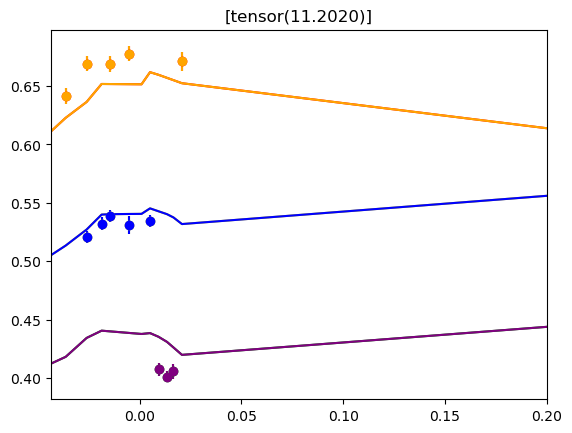

32


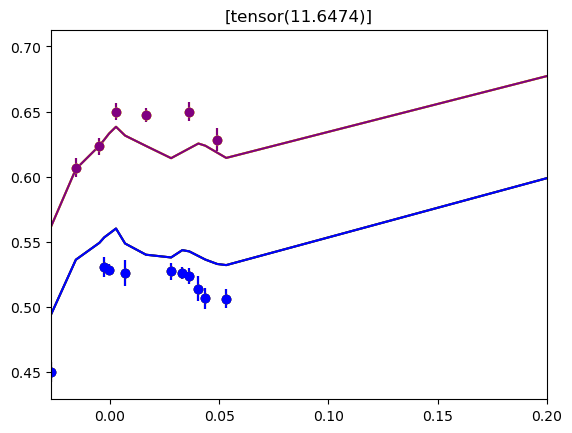

32


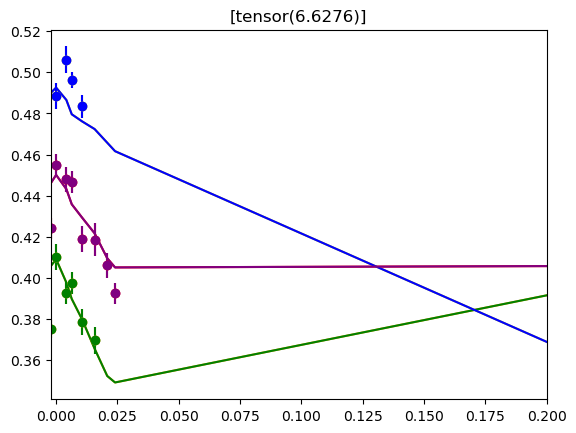

32


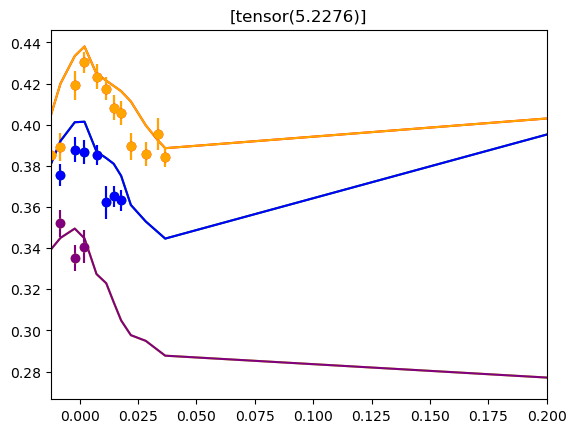

32


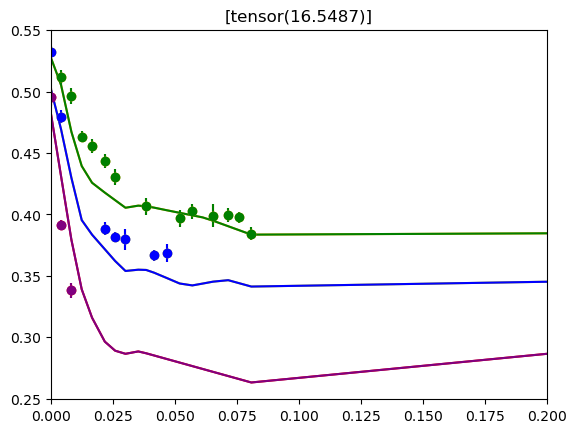

32


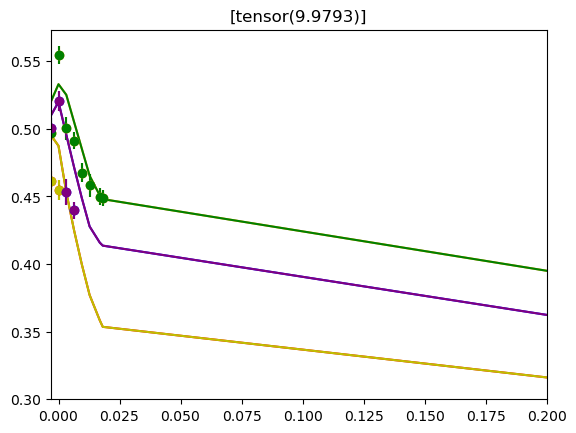

32


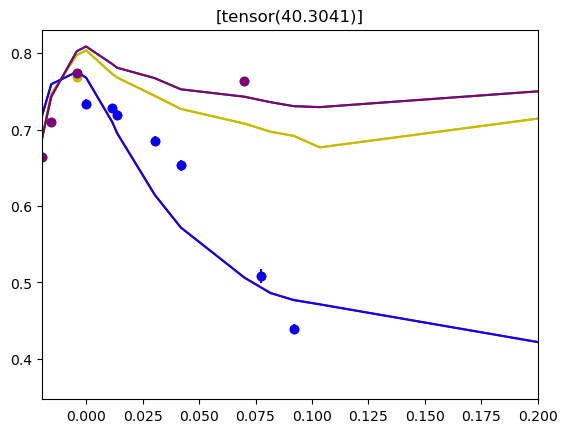

32


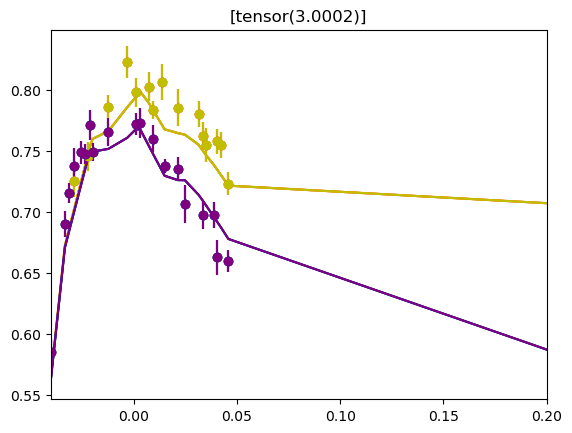

32


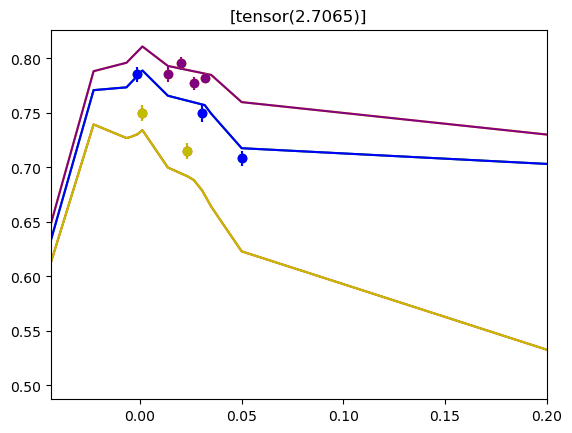

32


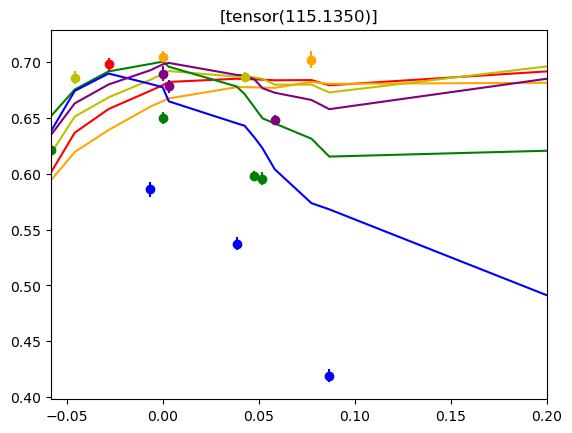

"\n# plot original LC to see where extra point at 0 comes from\nlcs = np.load(LCFILE, allow_pickle=True)['lcs']\nlc = lcs[0]\n\nfor b in range(6):\n    #plt.scatter(lc.times[lc.filters==b], -lc.abs_mags[lc.filters==b], c=colors[b])\n    plt.scatter(lc.dense_times, -lc.dense_lc[:,b,0], c=colors[b])\nplt.show()\n"

In [11]:
# plot decodings
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
import matplotlib.pyplot as plt
import numpy as np
import torch
from survey_agnostic_sn_vae.raenn import *

LCFILE = 'superraenn/lcs.npz'
OUTFILE = 'superraenn/outputs/out.npz'
OUTDIR = 'superraenn'

sequence, outseq, loss_mask, meta_dict = prep_input(LCFILE, save=True, outdir=OUTDIR)
device = 'cpu'
model_fn = os.path.join(OUTDIR, "contrastive_mahalonobis/model_2024-05-29_3_100.pt")
model = torch.load(model_fn).to(device)
model.device = device

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, meta=meta_dict, outdir=OUTDIR
)

out = np.load(OUTFILE, allow_pickle=True)
decodings = out['decodings']
z_means = out['z_means']
z_logvars = out['z_logvars']

#assert(len(np.unique(ids)) == len(ids))
#assert(len(np.unique(ids2)) == len(ids2))
#assert np.all(ids == ids2)

for i in range(10):
    dec = decodings[i]
    seq = sequence[i]
    loss_mask_x = loss_mask[i]
    z_mean = z_means[i:i+1]
    z_logvar = z_logvars[i:i+1]
    
    t = seq[:,0]
    print(len(t))
    f = seq[:,1:7]
    ferr = seq[:,7:13]

    colors = ['r','orange','y','g','b','purple']
    for b in range(6):
        mask = loss_mask_x[:,b].astype(bool)
        plt.errorbar(t[~mask], f[:,b][~mask], yerr=ferr[:,b][~mask], fmt='o', c=colors[b])
        plt.plot(t, dec[:,b], c=colors[b])
        
    l = loss_function(
        torch.from_numpy(seq[np.newaxis,:,:]),
        torch.from_numpy(dec[np.newaxis,:,:]),
        torch.from_numpy(loss_mask_x[np.newaxis,:,:]).bool(), 6,
        z_mean, z_logvar, None, None,
    )
    plt.title(l)
    plt.xlim((np.min(t), 0.2))
    plt.show()

"""
# plot original LC to see where extra point at 0 comes from
lcs = np.load(LCFILE, allow_pickle=True)['lcs']
lc = lcs[0]

for b in range(6):
    #plt.scatter(lc.times[lc.filters==b], -lc.abs_mags[lc.filters==b], c=colors[b])
    plt.scatter(lc.dense_times, -lc.dense_lc[:,b,0], c=colors[b])
plt.show()
"""


## Apply model to YSE light curves

In [3]:
# generate YSE lc file
import os
from survey_agnostic_sn_vae.data_imports.import_yse_dr1 import generate_raenn_file

test_dir = 'yse_dr1_zenodo_snr_geq_4/'
save_dir = 'superraenn/yse/'
os.makedirs(save_dir, exist_ok=True)
generate_raenn_file(test_dir, save_dir)

0
ZTF 66.847 95.66668631707114
YSE nan nan
joint 66.847 95.66668631707114
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
3309


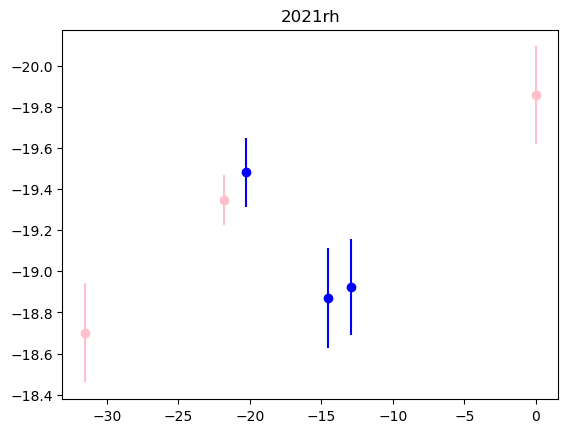

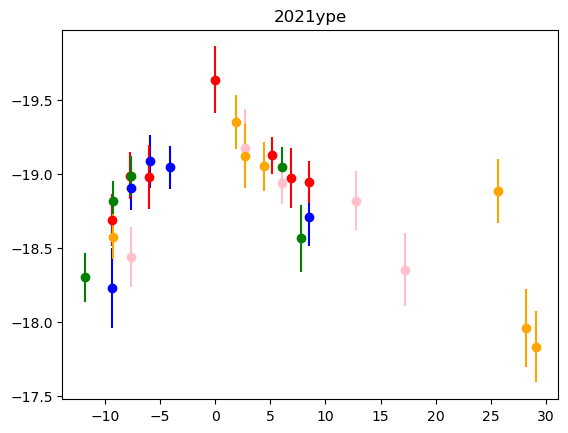

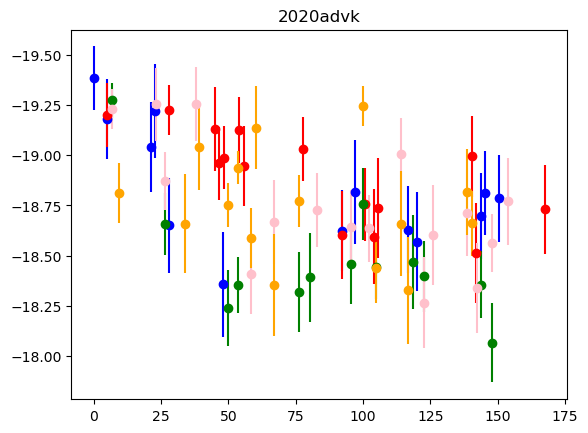

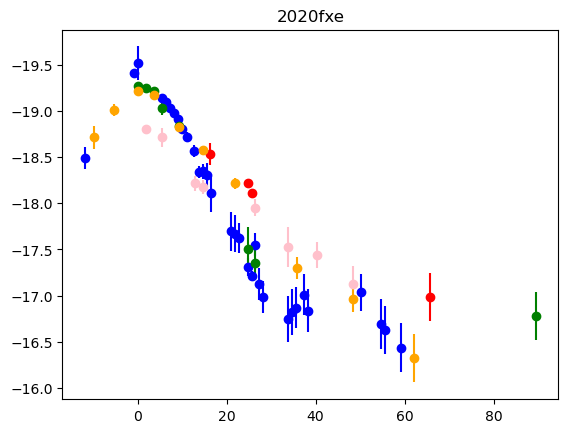

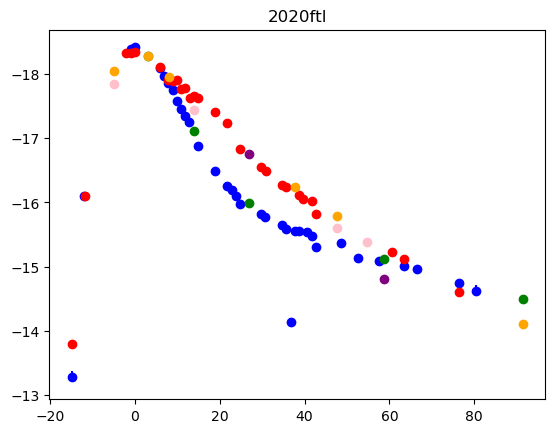

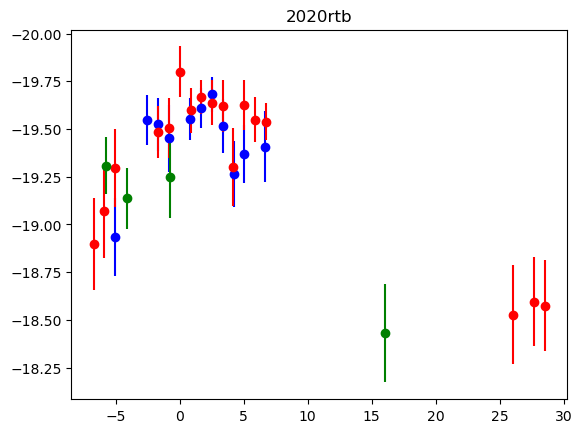

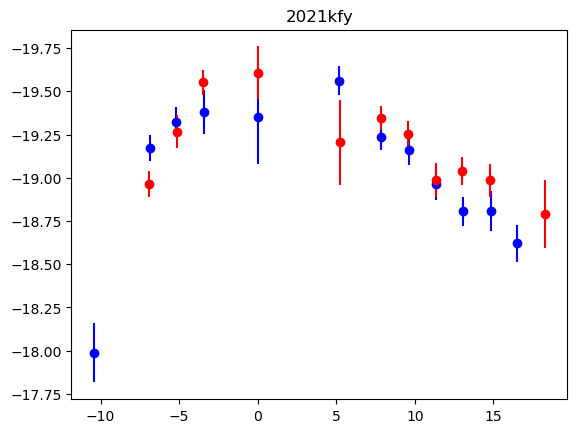

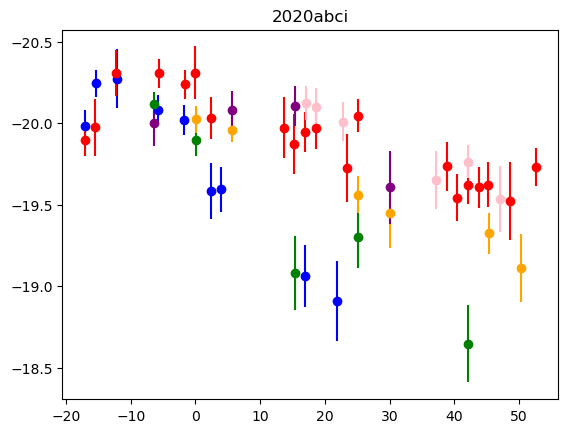

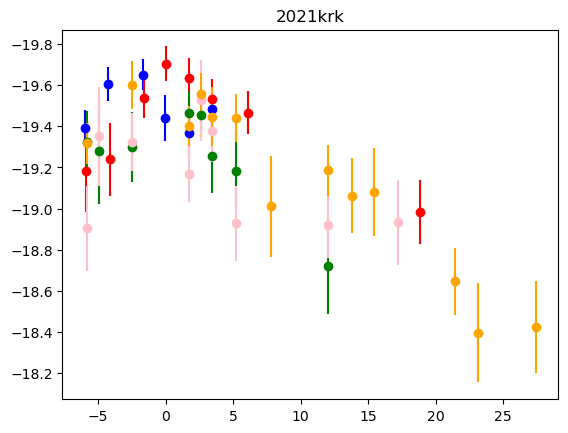

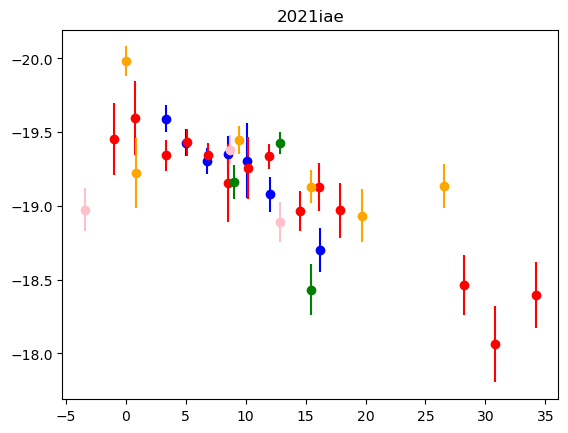

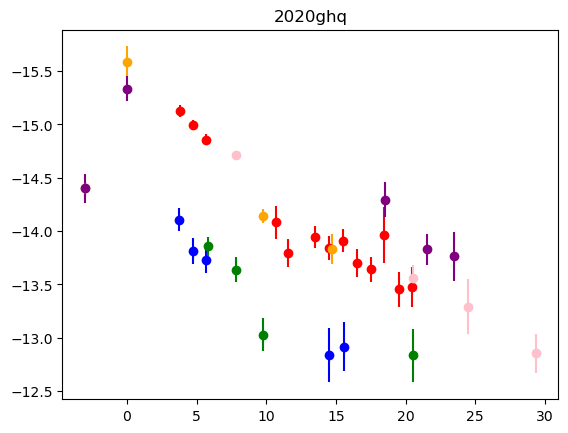

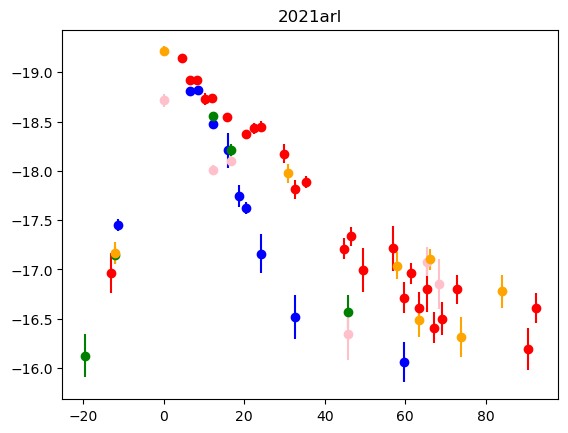

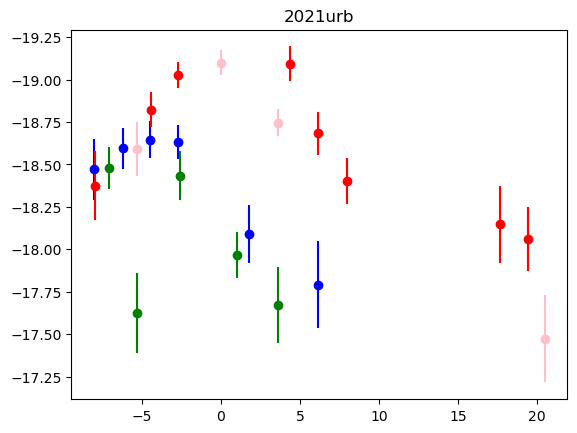

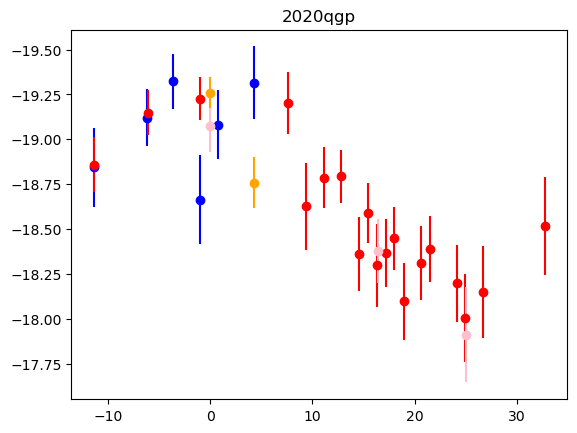

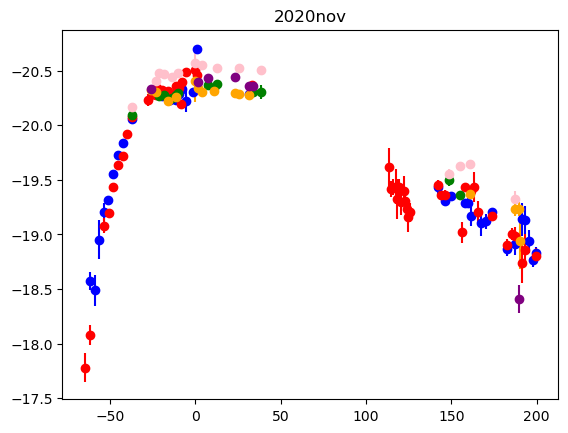

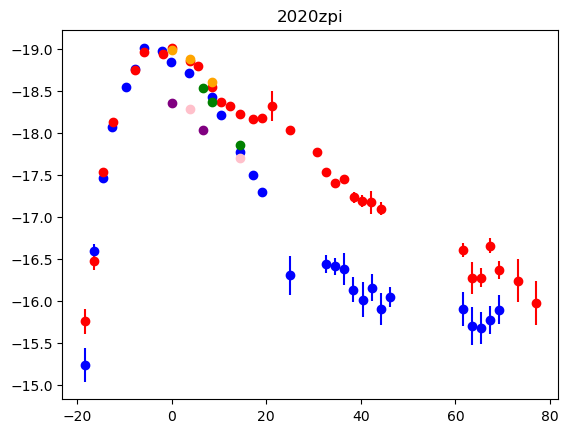

In [20]:
# plot example YSE LCs
from survey_agnostic_sn_vae.data_imports.import_helper import plot_lc
import numpy as np
import matplotlib.pyplot as plt

lc_file = 'superraenn/yse/lcs.npz'
lcs = np.load(lc_file, allow_pickle=True)['lcs']
for lc in lcs[:50]:
    if lc.survey != 'joint':
        continue
    fig, ax = plt.subplots()
    plot_lc(ax, lc)
    ax.invert_yaxis()
    ax.set_title(lc.name)
    plt.show()

In [27]:
import os
from survey_agnostic_sn_vae.data_imports.import_ztf import prep_lcs_superraenn
# same but with ZTF light curves

save_dir2 = 'superraenn/ztf/'
os.makedirs(save_dir2, exist_ok=True)

dataset_csv = '/Users/kdesoto/superphot_data/dataset_spec_pruned_iau.csv'
probs_csv = '/Users/kdesoto/superphot_data/probabilities/probs_concat.csv'
data_dir = '/Users/kdesoto/superphot_data/alerce_datafiles'

prep_lcs_superraenn(
    dataset_csv, probs_csv,
    data_dir, save_dir2
)


STARTS
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
5960


In [19]:
# check overlap between the 2 datasets
from survey_agnostic_sn_vae.data_imports.merge_datasets import plot_overlap

plot_overlap(
    'superraenn/yse/lcs.npz',
    'superraenn/ztf/lcs.npz',
    'figs/lc_overlaps'
)

In [7]:
from survey_agnostic_sn_vae.data_imports.merge_datasets import merge_two_lcs

merge_two_lcs(
    'superraenn/yse/lcs.npz',
    'superraenn/ztf/lcs.npz',
    'superraenn/yse/lcs_merged.npz'
)

3309 5960 9040


In [9]:
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import *

# augment trained models with YSE data
OUTDIR = 'superraenn/yse'
LCFILE = 'superraenn/yse/lcs_merged.npz'
PREPFILE = 'superraenn/prep.npz'

device = 'cpu'
batch_size=128

sequence, outseq, loss_mask, meta_dict = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)

model_fn = "superraenn/yse/models_contrastive/model.pt"
#model_fn = "superraenn/contrastive_mahalonobis/model_3_100.pt"
#model_fn = "superraenn/models/model_2024-05-16_3_100.pt"
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = sequence.shape[1]

os.makedirs('figs/yse_latent_space', exist_ok=True)

model = fit_model(
    model, sequence, outseq, loss_mask,
    n_epochs=500, device=device,
    batch_size=batch_size, learning_rate=1e-4,
    add_contrastive=True,
    metric='mahalonobis', temp=1.0,
    latent_space_plot_dir='figs/yse_latent_space'
)
os.makedirs('superraenn/yse/models_contrastive', exist_ok=True)
model.save(
    outdir=OUTDIR,
    model_dir='models_contrastive',
)

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, meta=meta_dict, outdir=OUTDIR
)


True
	Epoch 1 	Train Loss:  9.741148354714376 	Val Loss:  13.850984573364258
	Train [5.322737216949463, 2.9173519611358643, 1.4949586391448975] 	Test [11.690895080566406, 2.8141815662384033, 0.8875120878219604]
	Epoch 2 	Train Loss:  9.31048195822197 	Val Loss:  13.591435559590657
	Train [4.297049045562744, 2.7970340251922607, 3.3832693099975586] 	Test [11.920929908752441, 2.760077714920044, 0.4473090171813965]
	Epoch 3 	Train Loss:  9.027273855711284 	Val Loss:  13.232723871866861
	Train [5.653275489807129, 2.747062921524048, 1.40582275390625] 	Test [12.66504192352295, 2.736220121383667, 0.5664697885513306]
	Epoch 4 	Train Loss:  9.07848182477449 	Val Loss:  13.243605295817057
	Train [4.805119037628174, 2.776024580001831, 3.1327688694000244] 	Test [12.1615571975708, 2.745500087738037, 0.08831054717302322]
	Epoch 5 	Train Loss:  8.988065502099824 	Val Loss:  13.13760585784912
	Train [3.173121213912964, 2.725231647491455, 1.6466736793518066] 	Test [12.194830894470215, 2.740205764770508,

z_means
z_logvars
decodings
ids
surveys
classes
0.1698662 0.0036329713 0.0054382803
0.1698662 0.0051256544 0.006582417
0.1698662 0.0036329713 0.0054382803
0.1698662 0.0051256544 0.006582417
0.1698662 0.0022832365 0.0041320985
0.1698662 0.0022832365 0.0041320985


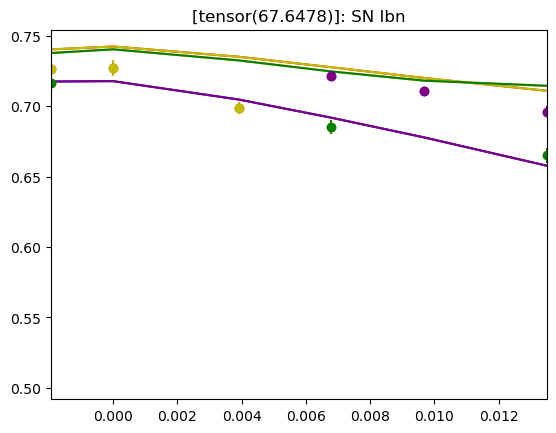

0.08894724 0.0071546547 0.014188617
0.08894724 0.009853542 0.014349618
0.08894724 0.009853542 0.014349618
0.08894724 0.009853542 0.014349618
0.08894724 0.0071546547 0.014188617
0.08894724 0.0071546547 0.014188617


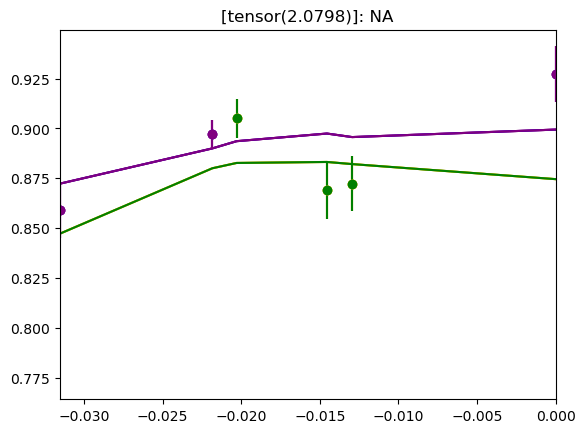

0.08275485 0.0073338826 0.013169325
0.08275485 0.008614208 0.015846578
0.08275485 0.008614208 0.015846578
0.08275485 0.008614208 0.015846578
0.08275485 0.0073338826 0.013169325
0.08275485 0.0073338826 0.013169325


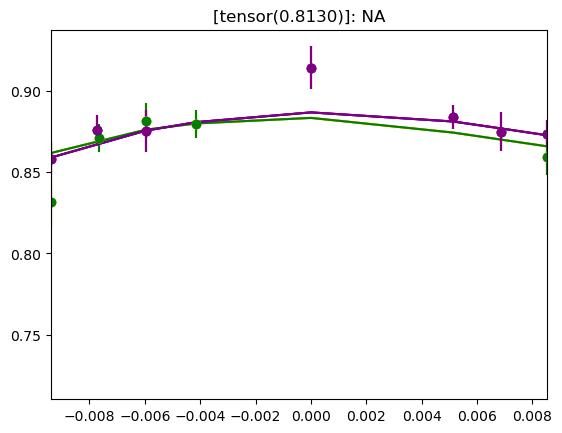

0.12846404 0.008255499 0.015307045
0.12846404 0.008974599 0.015451545
0.12846404 0.007878829 0.013405938
0.12846404 0.008255499 0.015307045
0.12846404 0.008974599 0.015451545
0.12846404 0.007878829 0.013405938


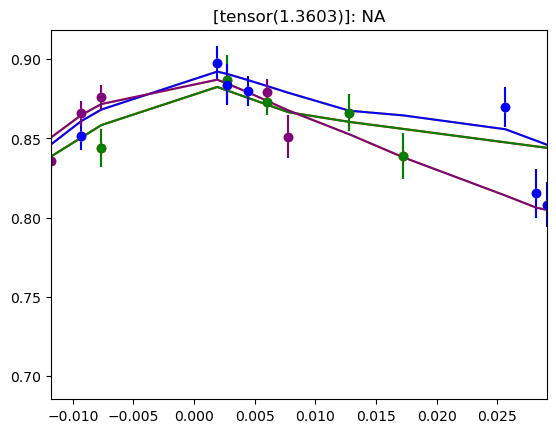

0.1363495 0.0073338826 0.013169325
0.1363495 0.008614208 0.015846578
0.1363495 0.008614208 0.015846578
0.1363495 0.0073338826 0.013169325
0.1363495 0.007878829 0.013405938
0.1363495 0.007878829 0.013405938


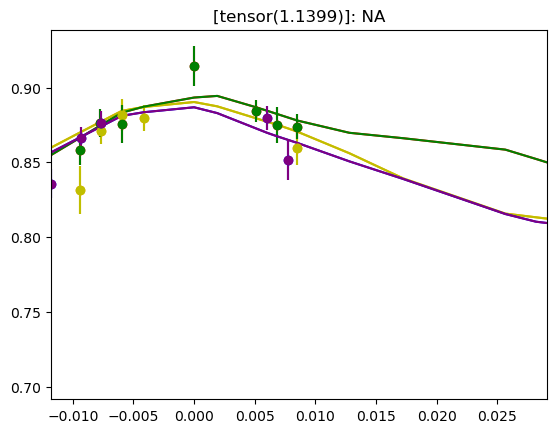

0.24341404 0.0024341403 0.013392602
0.24341404 0.0024341403 0.006542333
0.24341404 0.0024341403 0.006648126
0.24341404 0.0024341403 0.006542333
0.24341404 0.0024341403 0.006648126
0.24341404 0.0024341403 0.013392602


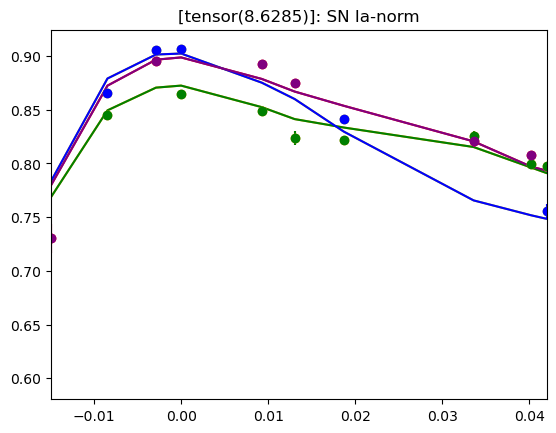

0.089087665 0.0059643826 0.0137051195
0.089087665 0.011737008 0.013448015
0.089087665 0.011737008 0.013448015
0.089087665 0.0059643826 0.0137051195
0.089087665 0.0059643826 0.0137051195
0.089087665 0.011737008 0.013448015


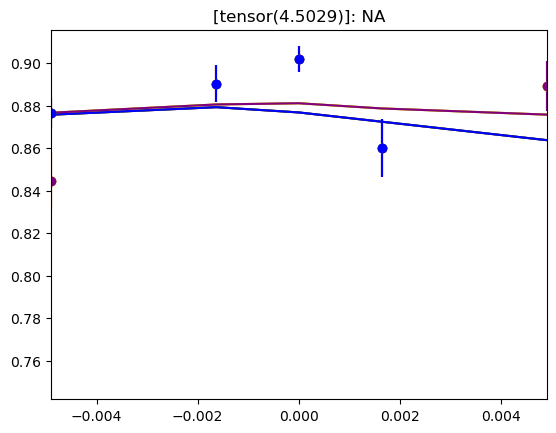

0.21551889 0.0030530675 0.0048855557
0.21551889 0.0024733313 0.003844398
0.21551889 0.0021551892 0.0043563778
0.21551889 0.0024733313 0.003844398
0.21551889 0.0021551892 0.0043563778
0.21551889 0.0030530675 0.0048855557


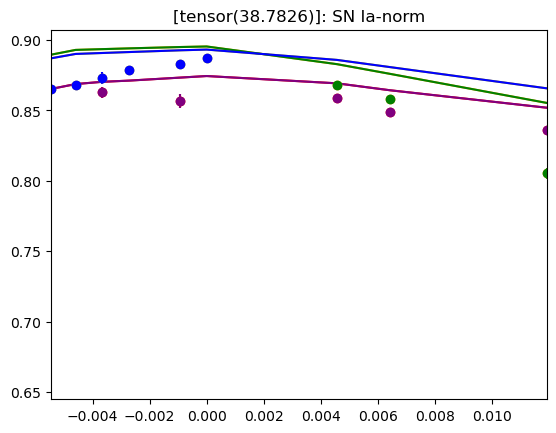

0.060380995 0.009343494 0.015305975
0.060380995 0.0073668114 0.014701984
0.060380995 0.0073668114 0.014701984
0.060380995 0.009343494 0.015305975
0.060380995 0.009343494 0.015305975
0.060380995 0.0073668114 0.014701984


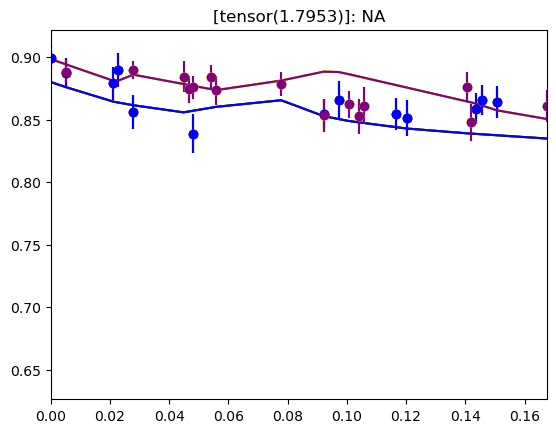

0.09897059 0.004899798 0.01564119
0.09897059 0.004899798 0.01564119
0.09897059 0.0051595448 0.013763206
0.09897059 0.0051595448 0.013763206
0.09897059 0.005913554 0.014603031
0.09897059 0.005913554 0.014603031


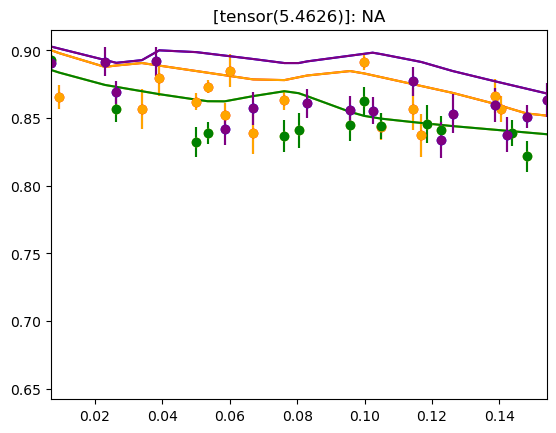

0.06719738 0.0073668114 0.012909971
0.06719738 0.0073668114 0.012909971
0.06719738 0.0051595448 0.013064689
0.06719738 0.009343494 0.015305975
0.06719738 0.009343494 0.015305975
0.06719738 0.0051595448 0.013064689


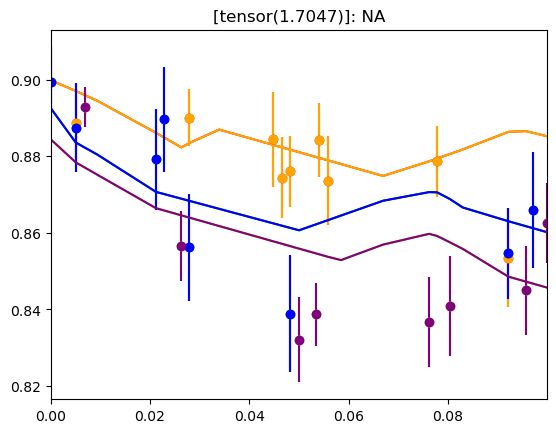

0.16989481 0.0016989487 0.0068936707
0.16989481 0.0017086653 0.01590803
0.16989481 0.0017086653 0.01590803
0.16989481 0.0017086653 0.01590803
0.16989481 0.0016989487 0.0068936707
0.16989481 0.0016989487 0.0068936707


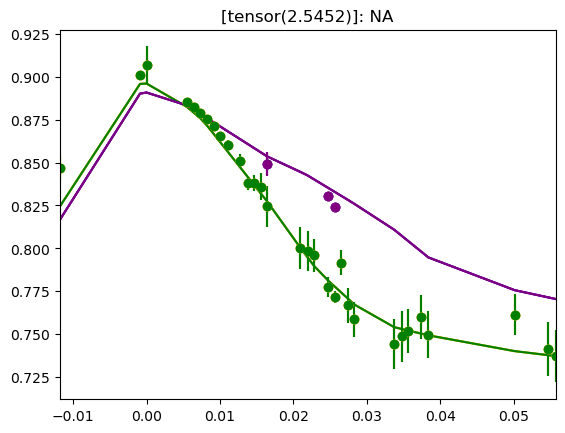

0.18818331 0.0018818327 0.015483866
0.18818331 0.002568833 0.012917042
0.18818331 0.002568833 0.012917042
0.18818331 0.0018818327 0.015483866
0.18818331 0.0018818327 0.015419773
0.18818331 0.0018818327 0.015419773


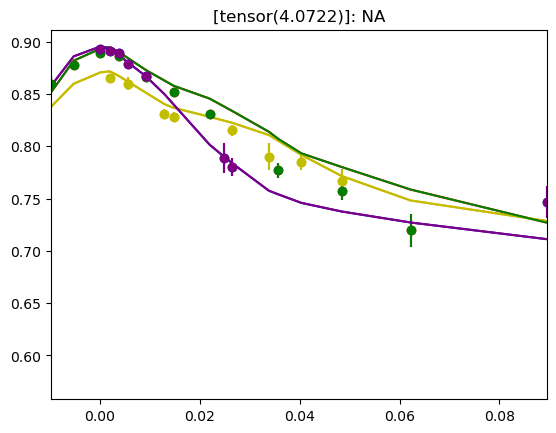

0.14035767 0.0017086653 0.012309739
0.14035767 0.0015439839 0.0068936707
0.14035767 0.0015439839 0.0068936707
0.14035767 0.0017086653 0.012309739
0.14035767 0.0016495663 0.013952163
0.14035767 0.0016495663 0.013952163


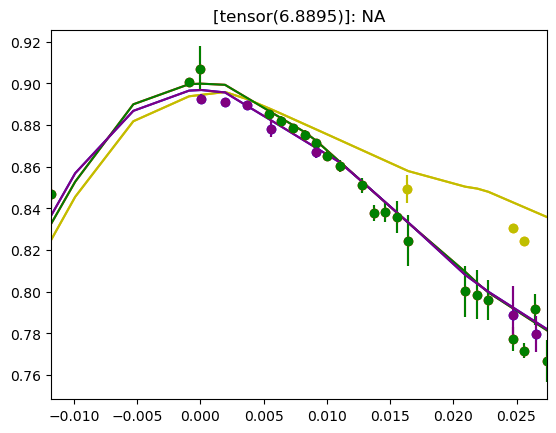

0.30176193 0.0030176193 0.0031441497
0.30176193 0.0030176193 0.005462568
0.30176193 0.0030176193 0.0031441497
0.30176193 0.0030176193 0.005462568
0.30176193 0.0030176193 0.0031441497
0.30176193 0.0030176193 0.005462568


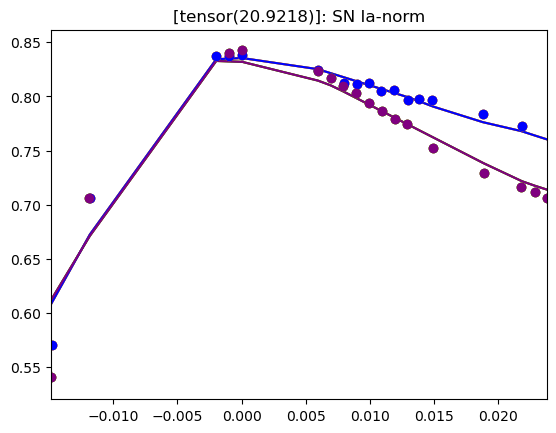

0.4544016 0.004544016 0.004544016
0.4544016 0.004544016 0.004544016
0.4544016 0.004544016 0.004544016
0.4544016 0.004544016 0.004544016
0.4544016 0.004544016 0.004544016
0.4544016 0.004544016 0.004544016


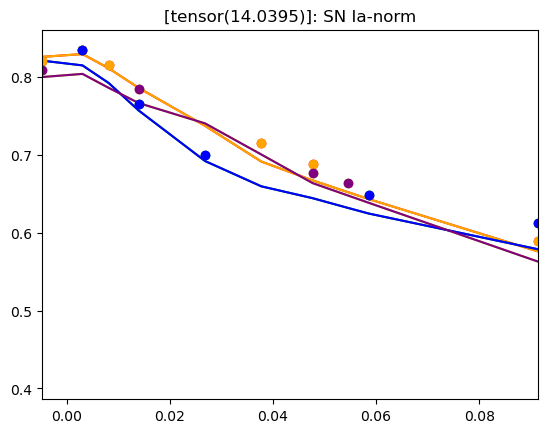

0.46290094 0.004629009 0.004629009
0.46290094 0.004629009 0.004629009


ValueError: zero-size array to reduction operation minimum which has no identity

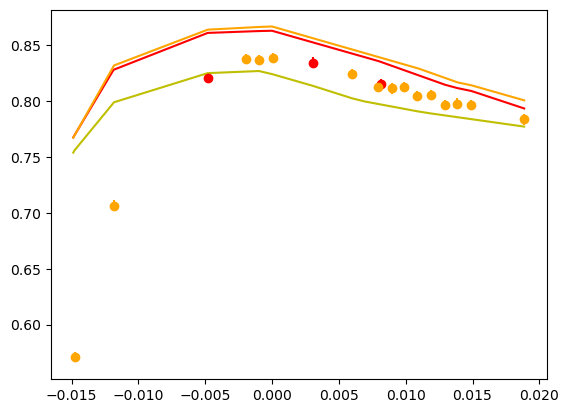

In [6]:
# plot decodings
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
import matplotlib.pyplot as plt
import numpy as np
import torch
from survey_agnostic_sn_vae.raenn import *

LCFILE = 'superraenn/yse/lcs_merged.npz'
OUTFILE = 'superraenn/yse/outputs/out.npz'
OUTDIR = 'superraenn/yse'
PREPFILE = 'superraenn/prep.npz'

sequence, outseq, loss_mask, meta_dict = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)
device = 'cpu'
model_fn = os.path.join(OUTDIR, "models_contrastive/model.pt")
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = sequence.shape[1]

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, meta=meta_dict, outdir=OUTDIR
)

out = np.load(OUTFILE, allow_pickle=True)
for k in out.files:
    print(k)
decodings = out['decodings']
z_means = out['z_means']
z_logvars = out['z_logvars']
ids2 = out['ids']
types = out['classes']

#assert(len(np.unique(ids)) == len(ids))
#assert(len(np.unique(ids2)) == len(ids2))
#assert np.all(ids == ids2)

for i in range(50):
    typ = types[i]
    dec = decodings[i]
    seq = sequence[i]
    loss_mask_x = loss_mask[i]
    z_mean = z_means[i:i+1]
    z_logvar = z_logvars[i:i+1]
    
    t = seq[:,0]
    f = seq[:,1:7]
    ferr = seq[:,7:13]
    amp = np.max(f) - np.min(f)

    colors = ['r','orange','y','g','b','purple']
    for b in range(6):
        mask = loss_mask_x[:,b].astype(bool)
        plt.errorbar(t[~mask], f[:,b][~mask], yerr=ferr[:,b][~mask], fmt='o', c=colors[b])
        plt.plot(t, dec[:,b], c=colors[b])
        
        print(amp, np.min(ferr[:,b][~mask]), np.max(ferr[:,b][~mask]))
        
    l = loss_function(
        torch.from_numpy(seq[np.newaxis,:,:]),
        torch.from_numpy(dec[np.newaxis,:,:]),
        torch.from_numpy(loss_mask_x[np.newaxis,:,:]).bool(), 6,
        z_mean, z_logvar, None, None,
    )
    plt.title(f'{l}: {typ}')
    plt.xlim((np.min(t), np.max(t[t<0.2])))
    plt.show()

In [9]:
# run classification on all Pan-STARRS samples
from survey_agnostic_sn_vae.classification import *
from superphot_plus.plotting.format_params import set_global_plot_formatting

set_global_plot_formatting()

OUTFILE = 'superraenn/yse/outputs/out.npz'
feats, feat_errs, y = get_data(
    OUTFILE,
    include_surveys=['YSE', 'joint', 'ZTF'],
    data_type='3way'
)
for t in np.unique(y):
    plt.scatter(feats[:,0][y == t], feats[:,1][y == t], s=2)
plt.show()

for t in np.unique(y):
    plt.scatter(feats[:,1][y == t], feats[:,2][y == t], s=2)
plt.show()

vanilla_rf(feats, feat_errs, y)
#vanilla_mlp(feats, feat_errs, y)

NameError: name 'survey_submask' is not defined